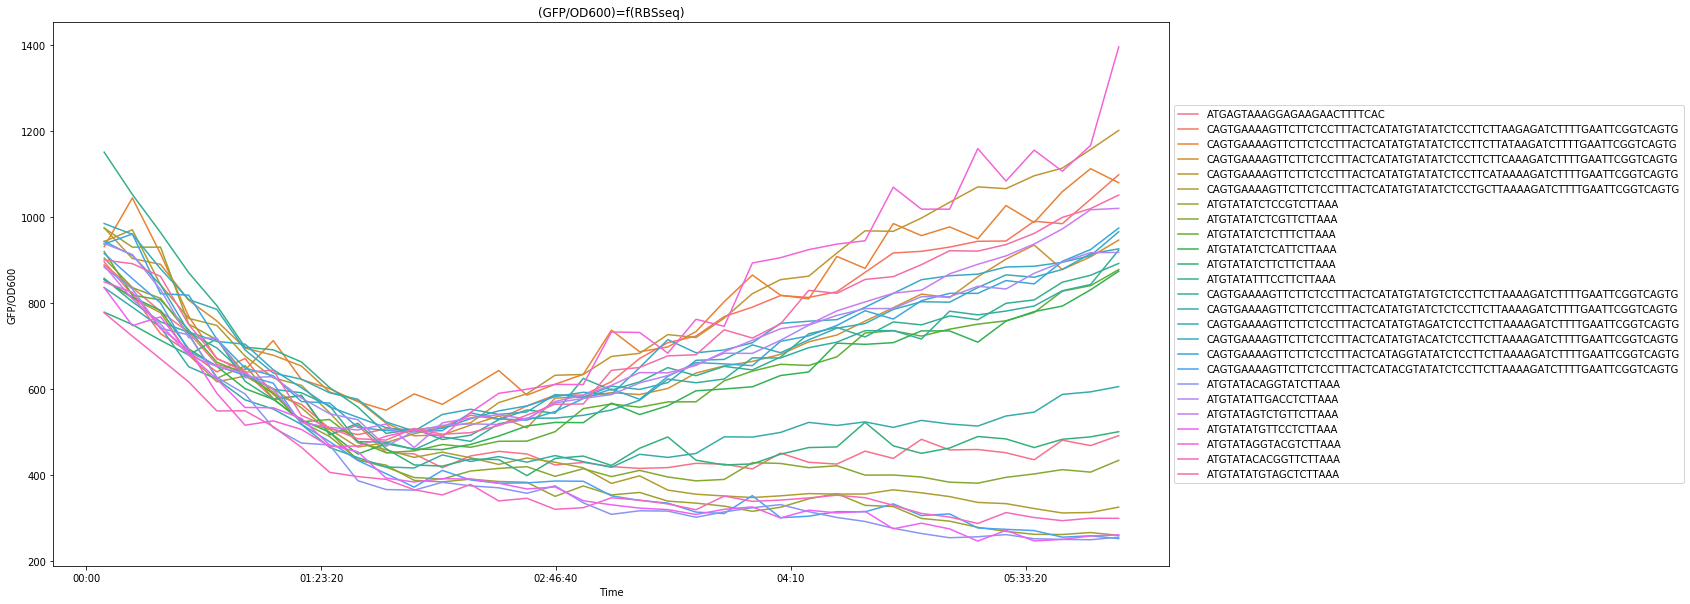

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
%matplotlib inline

#read the res(ults) file and the loc(ations) file
res =  pd.read_excel('Preliminary 170120 First Plate (Rep 1of1).xlsx',sheet_name='ODGFP',index_col=0)
loc = pd.read_excel('1st Primer Plate 11122019.xlsx')

#change rows from A01 to A1 format in the locations to match results file
for index, row in loc.iterrows():
    if int(row['Well Position'][1]) == 0:
        loc.at[index,'Well Position'] = row['Well Position'][0] + row['Well Position'][2] 

#change wells into 'Sequence'  or 'Sequence Name'

for col in res.columns:
    for index, row in loc.iterrows():
        if row['Well Position'] == col:
                m = re.search('ATGTATA(.+?)TCTTAAA', row['Sequence'].replace(" ",""))
                if m:
                    res.rename(columns={ col : m.group()}, inplace=True)
                else:
                    res.rename(columns={ col : row['Sequence'].replace(" ","")}, inplace=True)
                
#draw plot
plt.figure(figsize=(20, 10))
g=sns.lineplot(data=res,dashes=False)
plt.ylabel('GFP/OD600')
plt.title('(GFP/OD600)=f(RBSseq)')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))